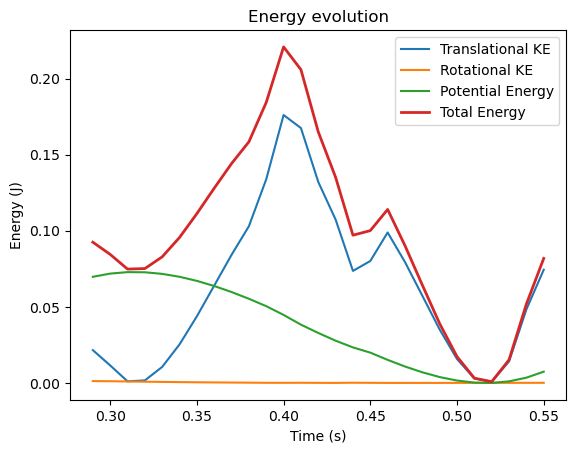

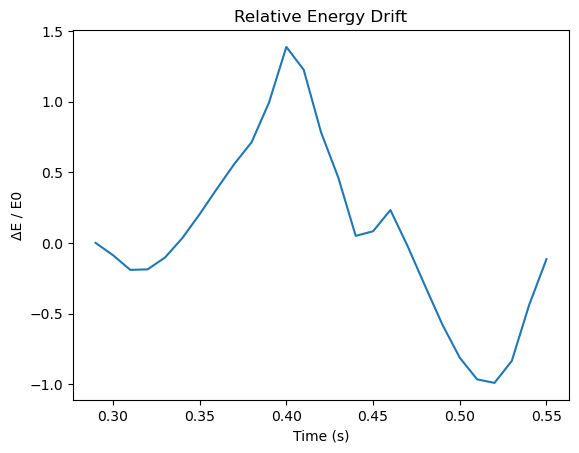

Max relative drift: 1.3872482291203088


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 物理参数（你自己填）
# -----------------------------

m = 0.0109      # kg (AAA 10.9g measured mass)
R = 0.0055      # m
L = 0.040      # m
g = 9.81

# -----------------------------
# 读取数据
# -----------------------------

data = np.loadtxt("rigidbody_data.txt", skiprows=1)

t = data[:,0]
x = data[:,1]
y = data[:,2]
vx = data[:,3]
vy = data[:,4]
theta = data[:,7]
omega = data[:,8]

# -----------------------------
# 转动惯量
# -----------------------------

I = (1/12) * m * (3*R**2 + L**2)

# -----------------------------
# 能量计算
# -----------------------------

T_trans = 0.5 * m * (vx**2 + vy**2)
T_rot = 0.5 * I * omega**2
h = np.max(y) - y
U = m * g * h  # 以最低点为零势能

E_total = T_trans + T_rot + U

# -----------------------------
# 画图
# -----------------------------

plt.figure()
plt.plot(t, T_trans, label="Translational KE")
plt.plot(t, T_rot, label="Rotational KE")
plt.plot(t, U, label="Potential Energy")
plt.plot(t, E_total, label="Total Energy", linewidth=2)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.title("Energy evolution")
plt.show()

# -----------------------------
# 能量守恒误差
# -----------------------------

E0 = E_total[0]
relative_error = (E_total - E0) / E0

plt.figure()
plt.plot(t, relative_error)
plt.title("Relative Energy Drift")
plt.xlabel("Time (s)")
plt.ylabel("ΔE / E0")
plt.show()

print("Max relative drift:", np.max(np.abs(relative_error)))
